In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [3]:
import pandas as pd
import seaborn as sns
import io
data=pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [4]:
del data['Unnamed: 32'] # Deleting last column

In [5]:
data.describe()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037183e+07    14.127292  ...        0.290076                 0.083946
std    1.250206e+08     3.524049  ...        0.061867                 0.018061
min    8.670000e+03     6.981000  ...        0.156500                 0.055040
25%    8.692180e+05    11.700000  ...        0.250400                 0.071460
50%    9.060240e+05    13.370000  ...        0.282200                 0.080040
75%    8.813129e+06    15.780000  ...        0.317900                 0.092080
max    9.113205e+08    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]

In [6]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Benign 357
Malignant 212


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


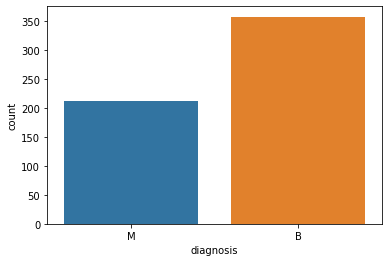

In [8]:
ax=sns.countplot(data['diagnosis'], label='Count')
B,M= data['diagnosis'].value_counts()
print('Benign',B)
print('Malignant', M)

In [54]:
data

id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302         M  ...          0.4601                  0.11890
1      842517         M  ...          0.2750                  0.08902
2    84300903         M  ...          0.3613                  0.08758
3    84348301         M  ...          0.6638                  0.17300
4    84358402         M  ...          0.2364                  0.07678
..        ...       ...  ...             ...                      ...
564    926424         M  ...          0.2060                  0.07115
565    926682         M  ...          0.2572                  0.06637
566    926954         M  ...          0.2218                  0.07820
567    927241         M  ...          0.4087                  0.12400
568     92751         B  ...          0.2871                  0.07039

[569 rows x 32 columns]

In [95]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df = data.apply(le.fit_transform)
df.head(10)

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
0   41          1  ...             485                      506
1   42          1  ...             222                      375
2  488          1  ...             445                      361
3  489          1  ...             499                      533
4  490          1  ...              81                      216
5   43          1  ...             466                      516
6   44          1  ...             335                      328
7  491          1  ...             373                      498
8   45          1  ...             483                      485
9  492          1  ...             482                      534

[10 rows x 32 columns]

In [96]:
X=df.iloc[:,2:]#.values
y=df.iloc[:,1]#.values

In [97]:
X.head(4)

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          370             1  ...             485                      506
1          426           186  ...             222                      375
2          406           324  ...             445                      361
3           98           297  ...             499                      533

[4 rows x 30 columns]

In [112]:
y.unique()

array([1, 0])

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, random_state=0)

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [14]:
#from sklearn.preprocessing import LabelEncoder
#label_y=LabelEncoder()
#label_y.fit_transform(y_train)

In [101]:
!pip install keras

In [102]:
import tensorflow as tf
import tensorflow
print(tensorflow.__version__)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2.3.0


In [103]:
model= keras.Sequential()
model.add(layers.Dense(16,activation='relu',input_dim=30))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [116]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [117]:
model.fit(X_train , y_train , batch_size=50, epochs=150)

Epoch 1/150
11/11 [==============================] - 0s 1ms/step - loss: 4.4238e-08 - accuracy: 0.9980
Epoch 2/150
11/11 [==============================] - 0s 1ms/step - loss: 4.4238e-08 - accuracy: 0.9980
Epoch 3/150
11/11 [==============================] - 0s 1ms/step - loss: 4.4238e-08 - accuracy: 0.9980
Epoch 4/150
11/11 [==============================] - 0s 1ms/step - loss: 4.4238e-08 - accuracy: 0.9980
Epoch 5/150
11/11 [==============================] - 0s 1ms/step - loss: 4.4238e-08 - accuracy: 0.9980
Epoch 6/150
11/11 [==============================] - 0s 1ms/step - loss: 4.4238e-08 - accuracy: 0.9980
Epoch 7/150
11/11 [==============================] - 0s 1ms/step - loss: 4.4238e-08 - accuracy: 0.9980
Epoch 8/150
11/11 [==============================] - 0s 1ms/step - loss: 4.4238e-08 - accuracy: 0.9980
Epoch 9/150
11/11 [==============================] - 0s 1ms/step - loss: 4.4238e-08 - accuracy: 0.9980
Epoch 10/150
11/11 [==============================] - 0s 1ms/step - loss:

In [118]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [122]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[ 0, 35],
       [ 0, 22]])